# Give Me Some Credit

* ### __Set 1: [Classifiers]__ [Due by 3.22 Wed]
  * The goal of this HW is to be familiar with the basic classifiers __PML__ Ch 3. 
  * For this HW, we will use [Give Me Some Credit]([http://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data](https://www.kaggle.com/datasets/brycecf/give-me-some-credit-dataset)) on Kaggle. You may download from Kaggle link or CMS.
  * Load `cs-training.csv` into a Pandas dataframe.
  * Fill-in the missing values (`nan`) with the column means. (Use `pd.fillna()` or See Ch 4 of `PML`)
  * Select the 2 most important features using LogisticRegression with L1 penalty. (Adjust C until you see 2 features)
  * Using the 2 selected features, apply LR / SVM / decision tree. Try your own hyperparameters (C, gamma, tree depth, etc) to maximize the prediction accuracy. (Just try several values. You don't need to show your answer is the maximum.)
  * Visualize your classifiers using the `plot_decision_regions` function from __PML__ Ch. 3
  * Put your result in `YOUR_GITHUB_ID/Give-Me-Some-Credit/code/Classifiers.ipynb`
* ### __Set 2: [PCA/Hyperparameter/CV]__ [Due by 3.29 Wed]
  * The goal of this HW is to be familiar with PCA (feature extraction), grid search, pipeline, k-fold CV. 
  * For this HW, we continue to use [Give Me Some Credit]([http://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data](https://www.kaggle.com/datasets/brycecf/give-me-some-credit-dataset)) on Kaggle. 
  * Extract a few (>2) features using PCA method.
  * Using the selected features from above, we are going to apply LR / SVM / decision tree (or any other algorithm). 
  * Implement the methods using pipeline. (__PML__ p185)
  * Use grid search for finding optimal hyperparameters. (__PML__ p199). In the search, apply 5-fold cross-validation.

## Importing libraries and data

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('magenta', 'blue', 'lightgreen', 'red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In [80]:
#importing training data to pandas dataframe

df=pd.read_csv('cs-training.csv')
#dftest=pd.read_csv('cs-test.csv')
print(df.shape)

dfy=df.iloc[:,1:2] #set the target column separate from dataframe
df=df.iloc[:,2:] #featuresx
df.fillna(df.mean(),inplace=True)
X=df.values
y=dfy.values
df

(150000, 12)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


Split the data

(100000, 10)
(50000, 10)
(100000, 1)
(50000, 1)


(array([93316.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6684.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

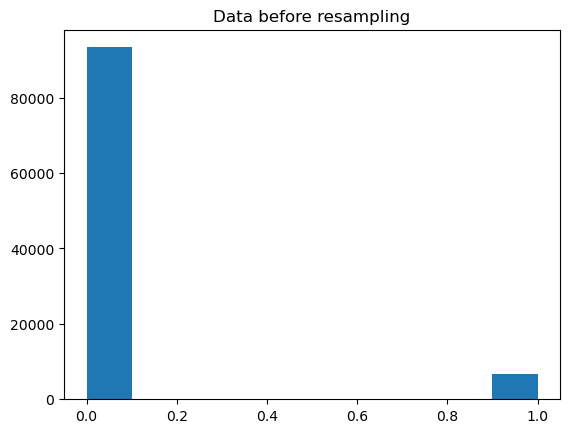

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=1/3, random_state=1, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

plt.title('Data before resampling')
plt.hist(y_train)
#plt.savefig('images/data_beforeresample_dist.png', dpi=300)

### Dealing with class imbalance

In [5]:
#Upsample
from sklearn.utils import resample

print('Number of class 1 examples before:', X_train[y_train == 1].shape)

X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape)
#print('Number of class 1 examples after:', y_upsampled.shape)

print(X_train.shape)
print(X_upsampled.shape)
print(y_train.shape)
print(y_upsampled.shape)

X_bal = np.vstack((X_train[y_train==0], X_upsampled))
y_bal = np.hstack((y_train[y_train==0], y_upsampled))

#check the data label balance
plt.title('Data after resampling')
plt.hist(y_bal)
#plt.savefig('images/data_upsample_dist.png', dpi=300)

Number of class 1 examples before: (6684, 10)
Number of class 1 examples after: (93316, 10)


Number of class 1 examples before: (93316, 10)
Number of class 1 examples after: (6684, 10)
(100000, 10)
(6684, 10)
(100000, 1)
(6684,)


(array([6684.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6684.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

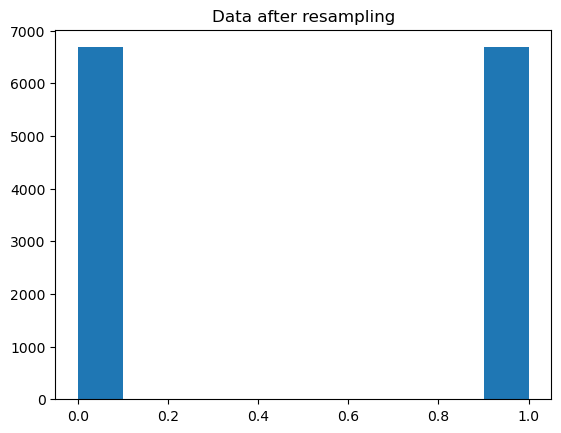

In [82]:
#DOWNSAMPLE

from sklearn.utils import resample

print('Number of class 1 examples before:', X_train[y_train == 0].shape)

X_downsampled, y_downsampled = resample(X_train[y_train == 0],
                                    y_train[y_train == 0],
                                    replace=True,
                                    n_samples=X_train[y_train == 1].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_downsampled.shape)
#print('Number of class 1 examples after:', y_upsampled.shape)

print(X_train.shape)
print(X_downsampled.shape)
print(y_train.shape)
print(y_downsampled.shape)

X_bal = np.vstack((X_train[y_train==1], X_downsampled))
y_bal = np.hstack((y_train[y_train==1], y_downsampled))

#check the data label balance
plt.title('Data after resampling')
plt.hist(y_bal)
#plt.savefig('images/data_upsample_dist.png', dpi=300)

### Standardizing the data.

In [83]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_bal)
X_test_std = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### Eigendecomposition of the covariance matrix.

In [12]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[3.04726637 1.5862118  0.00547999 0.01090976 0.50816132 1.17676985
 1.03342379 0.97270668 0.90811778 0.75100623]


Total and explained variance

In [28]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

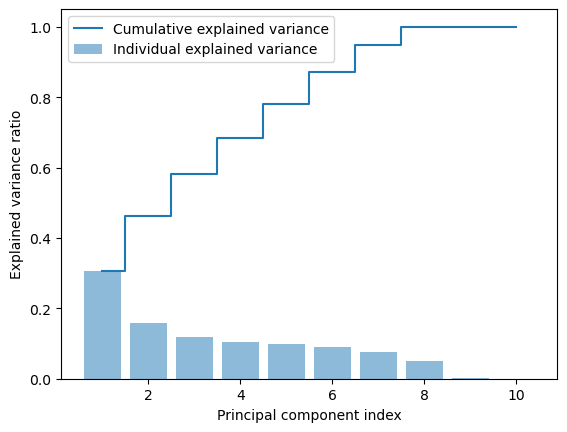

In [31]:
import matplotlib.pyplot as plt


plt.bar(range(1, 11), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 11), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('')
#plt.savefig('images/pca_cumulative_expvariance.png', dpi=300)
plt.show()

### Feature transformation

In [32]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.00182958  0.00126436]
 [ 0.08777452  0.30251478]
 [-0.56348172  0.12464129]
 [ 0.02794622  0.24270269]
 [ 0.0332015   0.26776814]
 [ 0.14856834  0.59961396]
 [-0.56601705  0.10412463]
 [ 0.1019304   0.61506938]
 [-0.56547771  0.11524465]
 [ 0.01716416  0.01930966]]


In [33]:
X_train_std[0].dot(w)

array([ 0.00757193, -1.04568264])

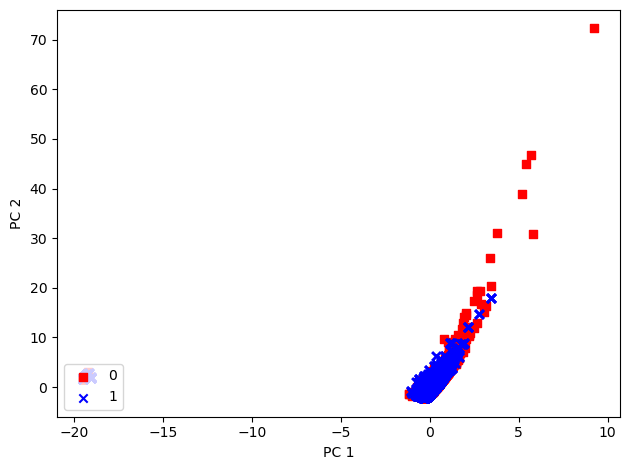

In [41]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_bal == l, 0], 
                X_train_pca[y_bal == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

In [39]:
X_train_pca[y_bal == l]

array([[ 0.00757193, -1.04568264],
       [ 0.13790278, -0.37298239],
       [ 0.37602532,  0.68569049],
       ...,
       [ 0.22457331,  0.00450767],
       [ 0.04242867, -0.76521364],
       [-0.01046158, -1.16523332]])

### PCA scikit

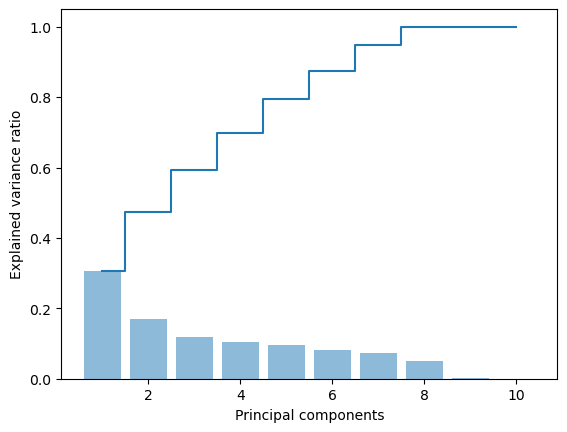

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [13]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [14]:
X_train_pca

array([[-0.11103749, -0.22924002,  0.02842462],
       [-0.29412897,  0.30333519, -2.07445723],
       [-0.11197141, -0.55278204, -1.23557768],
       ...,
       [-0.50805215,  1.310273  ,  1.8484069 ],
       [-0.04302823, -0.84856156, -2.62830079],
       [-1.40875698,  5.73127105,  2.8550621 ]])

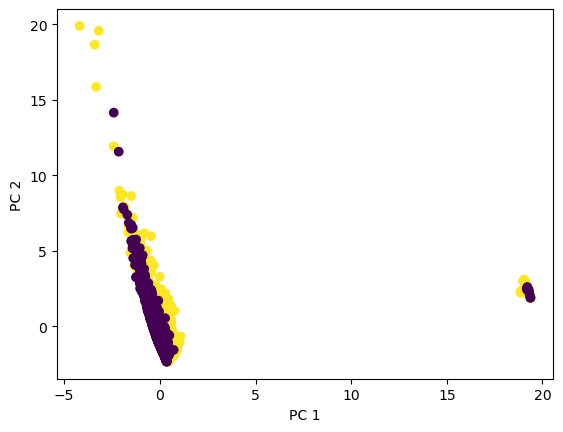

In [18]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],c=y_bal)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [24]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_bal)

C:\Users\martinbandung\AppData\Local\Temp\ipykernel_16156\1941716955.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


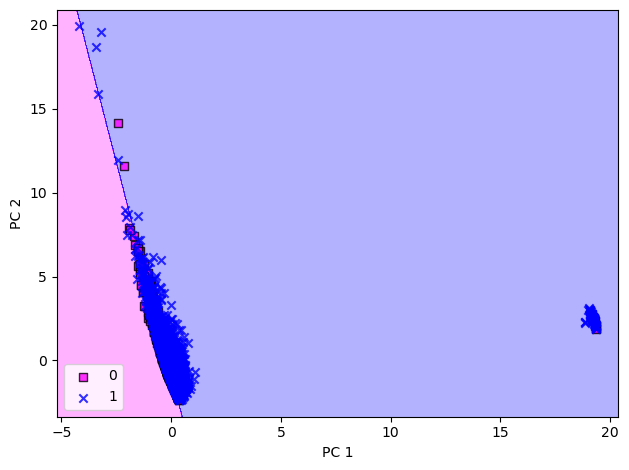

In [25]:
plot_decision_regions(X_train_pca, y_bal, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

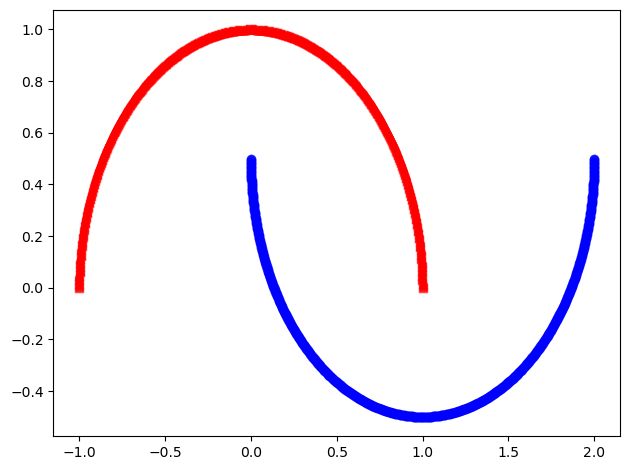

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=2000, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()

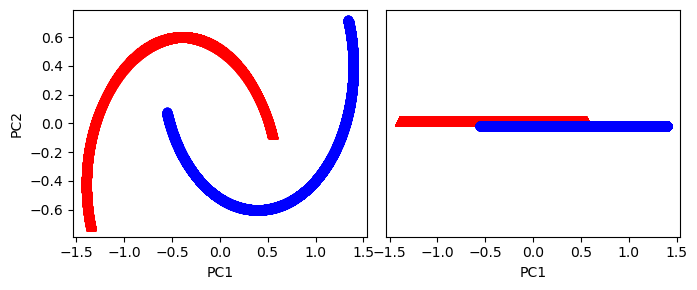

In [51]:
from sklearn.decomposition import PCA

n=50000

X, y = make_moons(n_samples=n, random_state=123)

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((int(n/2), 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((int(n/2), 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_13.png', dpi=300)
plt.show()

Skernel PCA to data try

In [38]:
from sklearn.decomposition import KernelPCA

#X, y = make_moons(n_samples=100, random_state=123)
ngamma=15
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=ngamma)
X_skernpca = scikit_kpca.fit_transform(X_bal)

plt.scatter(X_skernpca[y_bal == 0, 0], X_skernpca[y_bal == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y_bal == 1, 0], X_skernpca[y_bal == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KernelPCA(n_comp=2, rbf),gamma='+str(ngamma))
plt.savefig('images/KernelPCA_rbf_gamma'+str(ngamma)+'.png', dpi=300)
plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn.decomposition import KernelPCA

#X, y = make_moons(n_samples=5000, random_state=123)
ngamma=100
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=ngamma)
X_skernpca = scikit_kpca.fit_transform(X_bal)

plt.scatter(X_skernpca[y_bal == 0, 0], X_skernpca[y_bal == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y_bal == 1, 0], X_skernpca[y_bal == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KernelPCA(n_comp=2, rbf),gamma='+str(ngamma))
plt.savefig('images/KernelPCA_rbf_gamma'+str(ngamma)+'.png', dpi=300)
plt.show()

In [26]:
print('images/KernelPCA_rbf'+str(ngamma)+'.png')

images/KernelPCA_rbf15.png


(array([1671.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1671.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

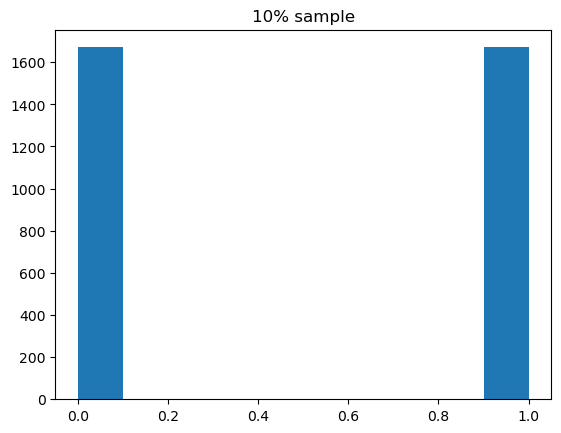

In [70]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_bal, y_bal, test_size=0.75, random_state=1, stratify=y_bal)

plt.title('10% sample')
plt.hist(y_train1)
#plt.savefig('images/data_beforeresample_dist.png', dpi=300)

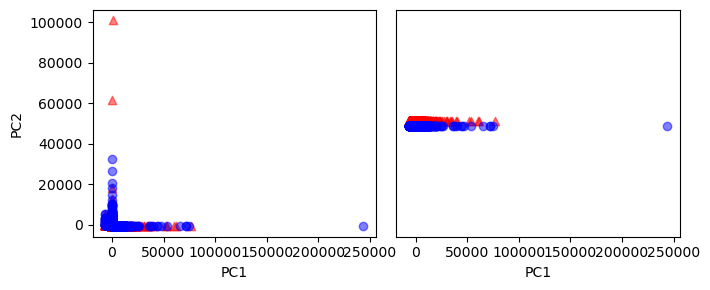

In [56]:
from sklearn.decomposition import PCA

X, y = X_train1, y_train1

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((int(y_train1.shape[0]/2), 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((int(y_train1.shape[0]/2), 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_13.png', dpi=300)
plt.show()

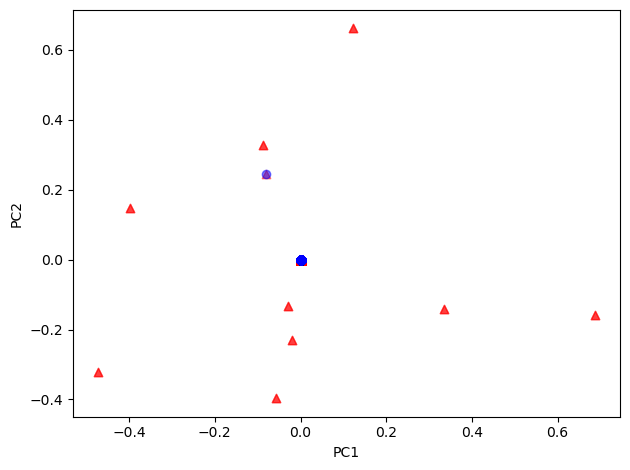

In [77]:
X, y = X_train1, y_train1

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=10000)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# plt.savefig('images/05_19.png', dpi=300)
plt.show()

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components=5, kernel='rbf', gamma=1000),
                        LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X, y)
y_pred = pipe_lr.predict(X_test1)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test1, y_test1))

Test Accuracy: 0.500


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X_bal, y_bal)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=5).split(X_bal, y_bal)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_bal[train], y_bal[train])
    score = pipe_lr.score(X_bal[test], y_bal[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_bal[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Test Accuracy: 0.729
Fold:  1, Class dist.: [5347 5347], Acc: 0.699
Fold:  2, Class dist.: [5347 5347], Acc: 0.680
Fold:  3, Class dist.: [5347 5347], Acc: 0.704
Fold:  4, Class dist.: [5348 5347], Acc: 0.691
Fold:  5, Class dist.: [5347 5348], Acc: 0.686

CV accuracy: 0.692 +/- 0.009


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(),
                        LogisticRegression(random_state=1, solver='lbfgs'))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'logisticregression__C': param_range,
              'pca__n_components':[3,4,5]}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_bal, y_bal)
print(gs.best_score_)
print(gs.best_params_)

0.6946431264639525
{'logisticregression__C': 10.0, 'pca__n_components': 3}
